# Description 📞
> Making a machine learning project to find whether the customer will stay or churn (data is from Telecom Industry)
# Data Source : 
> Data is from Kaggle (https://www.kaggle.com/datasets/barun2104/telecom-churn)
# Goal :
> The goal of the project is to make a real time website that calculates customer churn in telecom industry using Machine learning, Python and Flask.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('../input/telecom-churn/telecom_churn.csv',low_memory=False)

In [3]:
data.head().T

,0,1,2,3,4
Churn,0.00,0.00,0.00,0.0,0.00
AccountWeeks,128.00,107.00,137.00,84.0,75.00
ContractRenewal,1.00,1.00,1.00,0.0,0.00
DataPlan,1.00,1.00,0.00,0.0,0.00
DataUsage,2.70,3.70,0.00,0.0,0.00
CustServCalls,1.00,1.00,0.00,2.0,3.00
DayMins,265.10,161.60,243.40,299.4,166.70
DayCalls,110.00,123.00,114.00,71.0,113.00
MonthlyCharge,89.00,82.00,52.00,57.0,41.00
OverageFee,9.87,9.78,6.06,3.1,7.42


In [4]:
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### Checking % of Null data in the dataset

In [6]:
data.isna().sum()*100/len(data)

Churn              0.0
AccountWeeks       0.0
ContractRenewal    0.0
DataPlan           0.0
DataUsage          0.0
CustServCalls      0.0
DayMins            0.0
DayCalls           0.0
MonthlyCharge      0.0
OverageFee         0.0
RoamMins           0.0
dtype: float64

In [7]:
len(data)

3333

## Working on Outliers

In [8]:
from scipy import stats #using stats funcation from scipy
data[(np.abs(stats.zscore(data))<3).all(axis=1)]

#this removes all the outliers (values having a zscore of greater than 3 or -3) Used scipy for this

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


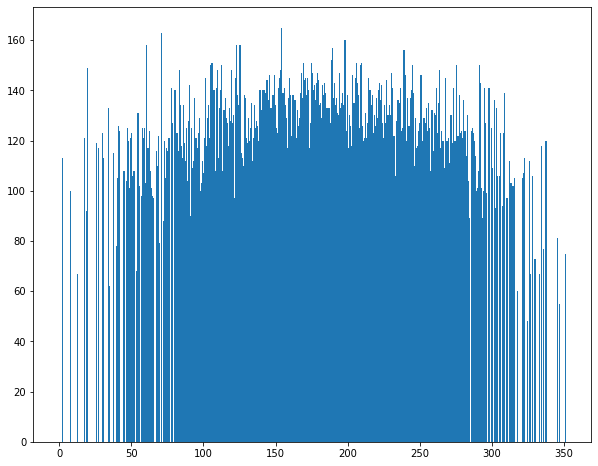

In [10]:
ax,fig=plt.subplots(figsize=(10,8))
ax1=plt.bar(data['DayMins'],data['DayCalls'])
#x shows number of mins spend on calls and y represents number of calls in the day.

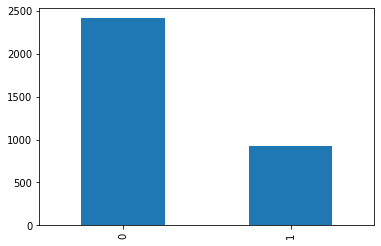

In [11]:
data['DataPlan'].value_counts().plot(kind='bar');

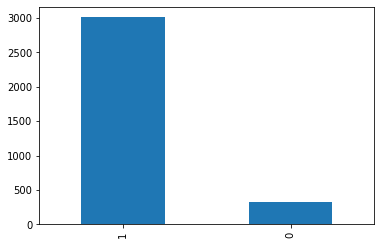

In [12]:
data['ContractRenewal'].value_counts().plot(kind='bar');

## Since the data is already in numerical we dont need to perform any encoding to it. We are set to make a model on this data

In [13]:
#making the model